<a href="https://colab.research.google.com/github/ssarker21/Introduction-to-Machine-Learning/blob/main/Homework_1/Problem1(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The cost for given values of theta = 5.524438459196242
Final value of theta = [ 5.71850653 -1.9568206 ]
cost_history = [5.48226715 5.44290965 5.40604087 ... 0.99063932 0.99061433 0.99058944]


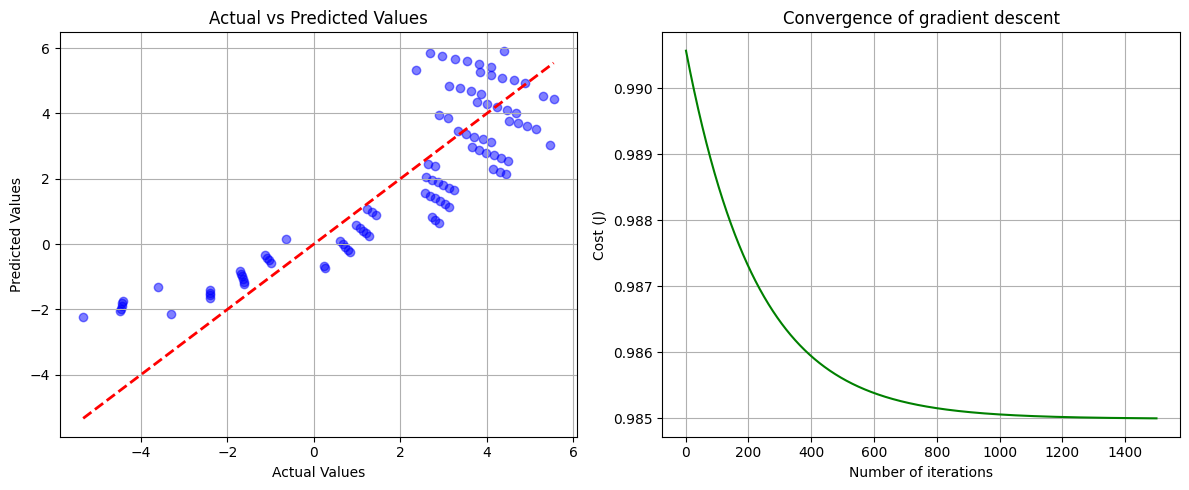

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the dataset from D3
url = 'https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/main/Dataset/D3.csv'
df = pd.read_csv(url)

# Separate features and labels
X = df.values[:, 0]
y = df.values[:, 3]
m = len(y)
n = len(X)

# Create the design matrix
X_0 = np.ones((m, 1))
X_1 = X.reshape(m, 1)
X = np.hstack((X_0, X_1))

# Initialize theta with zeros
theta = np.zeros(2)

# Cost Calculation
def compute_cost(X, y, theta):

    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta =', cost)

def gradient_descent(X, y, theta, alpha, iterations):


    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

theta = [0., 0.]
iterations = 1500
alpha = 0.01


theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
# Create a figure with two subplots
plt.figure(figsize=(12, 5))

# First subplot: Actual vs Predicted values
plt.subplot(1, 2, 1)
predictions = X.dot(theta)
plt.scatter(y, predictions, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.grid(True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

# Second subplot: Convergence of gradient descent
plt.subplot(1, 2, 2)
plt.plot(range(1, iterations + 1), cost_history, color='green')
plt.grid(True)
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()